# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari kaggle Dataset ini berisi informasi tentang para penumpang kapal RMS Titanic yang tenggelam pada tahun 1912 setelah menabrak gunung es. Dari total sekitar 2.224 penumpang dan kru, 1.502 di antaranya meninggal dunia..


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
#Type your code here
import pandas as pd

df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
#Type your code here

print("\nINFO DATASET")
df.info()

print("\nSTATISTIK DESKRIPTIF")
df.describe()

print("\nJUMLAH MISSING VALUES")
df.isnull().sum()



INFO DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

STATISTIK DESKRIPTIF

JUMLAH MISSING VALUES


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


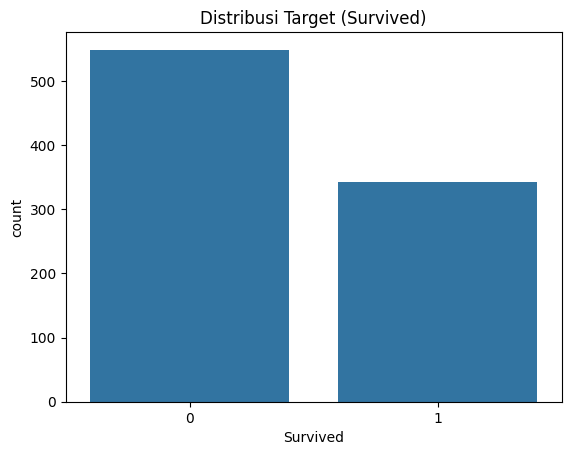

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Survived", data=df)
plt.title("Distribusi Target (Survived)")
plt.show()


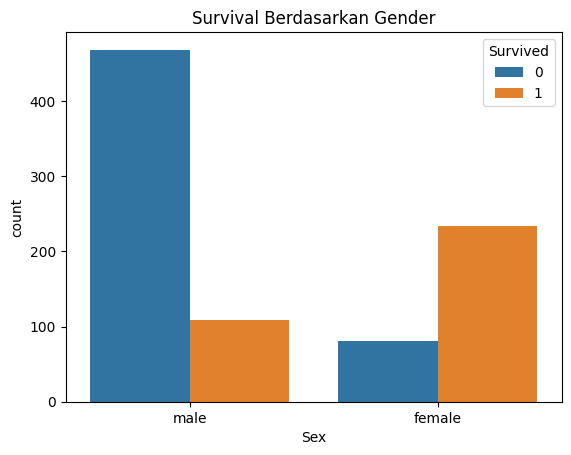

In [6]:
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Berdasarkan Gender")
plt.show()


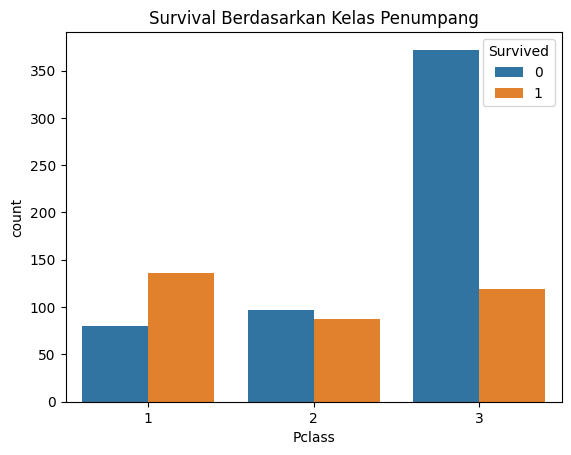

In [7]:
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival Berdasarkan Kelas Penumpang")
plt.show()


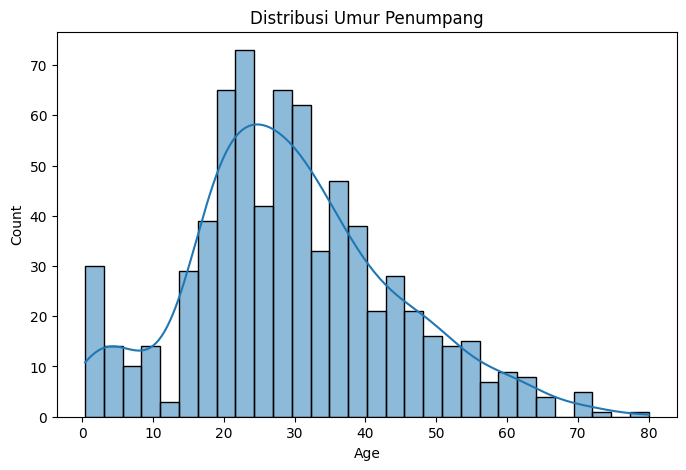

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Distribusi Umur Penumpang")
plt.show()


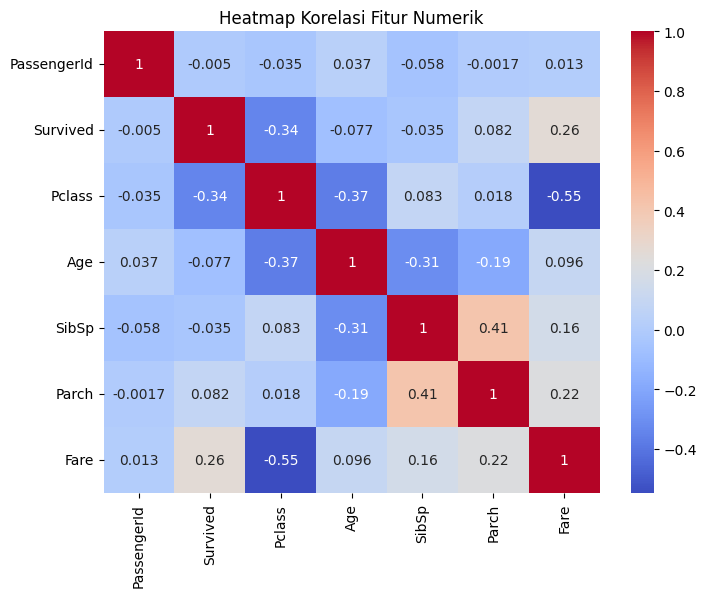

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:

# DATA PREPROCESSING



df_prep = df.copy()

# 1. Drop kolom yang tidak relevan
df_prep.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

# 2. Menangani missing values
# Age -> median
df_prep["Age"].fillna(df_prep["Age"].median(), inplace=True)

# Embarked -> modus
df_prep["Embarked"].fillna(df_prep["Embarked"].mode()[0], inplace=True)

# 3. Encoding fitur kategorikal
df_prep = pd.get_dummies(
    df_prep,
    columns=["Sex", "Embarked"],
    drop_first=True
)

# 4. Split fitur dan target
X = df_prep.drop("Survived", axis=1)
y = df_prep["Survived"]

# 5. Cek hasil preprocessing
print("Shape X:", X.shape)
print("Shape y:", y.shape)

X.head()


Shape X: (891, 8)
Shape y: (891,)


/tmp/ipython-input-169949341.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep["Age"].fillna(df_prep["Age"].median(), inplace=True)
/tmp/ipython-input-169949341.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [12]:
import os

OUTPUT_PATH = "/content/Eksperimen_SML_Muhamad_Naufal_Wijdan_P/kaggle_preprocessing/titanic_preprocessing.csv"

# Create the directory if it does not exist
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

df_prep.to_csv(OUTPUT_PATH, index=False)
print("Saved to:", OUTPUT_PATH)

Saved to: /content/Eksperimen_SML_Muhamad_Naufal_Wijdan_P/kaggle_preprocessing/titanic_preprocessing.csv


In [13]:
!python Eksperimen_SML_Muhamad_Naufal_Wijdan_P/preprocessing/automate_Muhamad_Naufal_Wijdan_P.py


python3: can't open file '/content/Eksperimen_SML_Muhamad_Naufal_Wijdan_P/preprocessing/automate_Muhamad_Naufal_Wijdan_P.py': [Errno 2] No such file or directory


In [14]:
!ls Eksperimen_SML_Muhamad_Naufal_Wijdan_P/preprocessing


ls: cannot access 'Eksperimen_SML_Muhamad_Naufal_Wijdan_P/preprocessing': No such file or directory


In [15]:
!python Eksperimen_SML_Muhamad_Naufal_Wijdan_P/preprocessing/automate_Muhamad_Naufal_Wijdan_P.py


python3: can't open file '/content/Eksperimen_SML_Muhamad_Naufal_Wijdan_P/preprocessing/automate_Muhamad_Naufal_Wijdan_P.py': [Errno 2] No such file or directory


In [16]:
!zip -r Eksperimen_SML_Muhamad_Naufal_Wijdan_P.zip Eksperimen_SML_Muhamad_Naufal_Wijdan_P


  adding: Eksperimen_SML_Muhamad_Naufal_Wijdan_P/ (stored 0%)
  adding: Eksperimen_SML_Muhamad_Naufal_Wijdan_P/kaggle_preprocessing/ (stored 0%)
  adding: Eksperimen_SML_Muhamad_Naufal_Wijdan_P/kaggle_preprocessing/titanic_preprocessing.csv (deflated 84%)
